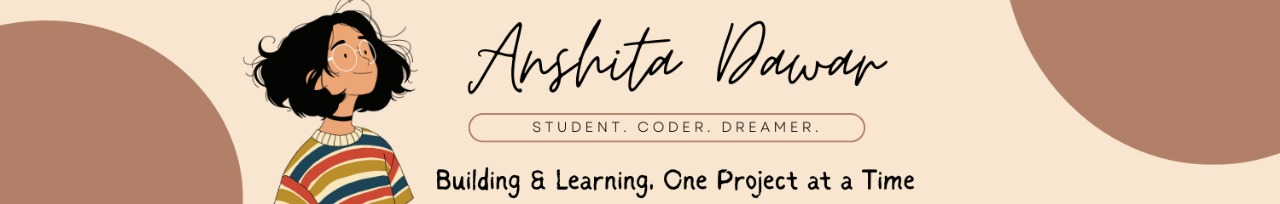

---

<!-- =============================== -->
<!-- Agenda -->
<div style="background-color:#FFFACD; padding:15px; border-radius:8px;">
<h2 style="text-align:center; font-family:'Comic Sans MS','Bradley Hand', cursive; font-weight:bold;">
Agenda - Scraping Top Gainer 25 CryptoCurrencies
</h2>

- [Importing Libraries](#Importing-Libraries)
- [Adding Headers](#Adding-Headers)
- [Requesting url](#Requesting-url)
- [Getting Response](#Getting-Response)
- [Accessing the Code](#Accessing-the-Code)
- [Finding Table and its Rows that Contains the Details](#Finding-Table-and-its-Rows-that-Contains-the-Details)
- [Creating Empty List](#Creating-Empty-List)
- [Accessing Required Information](#Accessing-Required-Information)
- [Naming Columns](#Naming-Columns)
- [Converting Into DataFrame](#Converting-Into-DataFrame)
- [Saving to CSV File](#Saving-to-CSV-File)
- [Number of Rows and Columns](Number-of-Rows-and-Columns)
- [Using Describe Function](Using-Describe=Function)
- [Using Sample Function](Using-Sample-Function)
- [Using Head Function](Using-Head-Function)
- [Checking null values sum](Checking-null-values-sum)

</div>

<!-- =============================== -->
<!-- Topic -->
<div style="background-color:#E0FFFF; padding:15px; border-radius:8px;">
<h3 style="text-align:center; font-family:'Comic Sans MS','Bradley Hand', cursive; font-weight:bold;">
Scraping Yahoo! Finance
</h3>
</div>




# Top 25 Gainer Crypto Currency

### Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Adding Headers

In [2]:
headers = {
    "User-Agent": "Mozilla/5.0"
}

### Requesting url

In [3]:
url = "https://finance.yahoo.com/markets/crypto/gainers/"

In [4]:
response = requests.get(url, headers=headers)

### Accessing the Code

In [5]:
soup = BeautifulSoup(response.text, "html.parser")

### Finding Table and its Rows that Contains the Details

In [6]:
table = soup.find("table")
if table is None:
    print("Table not found. The data may be loaded dynamically")
else:
    rows = table.find("tbody").find_all("tr")

### Creating Empty List

In [7]:
data = []

### Accessing required Information

In [8]:
for row in rows:
        cols = row.find_all("td")
        data.append([col.get_text(strip=True) for col in cols])

In [9]:
data

[['PORT11220-USD',
  'Port Finance USD',
  '',
  '0.004388+0.004231(+2,694.87%)',
  '+0.004231',
  '+2,694.87%',
  '0',
  '82,729',
  '82,729',
  '82,729',
  '0',
  '-97.89%',
  ''],
 ['CATX31291-USD',
  'CATX USD',
  '',
  '0.00000636+0.00000608(+2,168.12%)',
  '+0.00000608',
  '+2,168.12%',
  '0',
  '122,282',
  '122,282',
  '122,282',
  '0',
  '+600.00%',
  ''],
 ['SNL35953-USD',
  'Snow Leopard USD',
  '',
  '0.00000032+0.00000029(+1,055.80%)',
  '+0.00000029',
  '+1,055.80%',
  '0',
  '131,669',
  '131,669',
  '131,669',
  '0',
  '--',
  ''],
 ['MAGA33521-USD',
  'PEPE MAGA USD',
  '',
  '0.002745+0.002387(+666.49%)',
  '+0.002387',
  '+666.49%',
  '0',
  '930,745',
  '930,745',
  '930,745',
  '0',
  '+19,050.00%',
  ''],
 ['NEIRO33184-USD',
  'Neiro Pump USD',
  '',
  '0.001007+0.000856(+567.29%)',
  '+0.000856',
  '+567.29%',
  '0',
  '499,873',
  '499,873',
  '499,873',
  '0',
  '+9,900.00%',
  ''],
 ['DARAM-USD',
  'DARAM AI USD',
  '',
  '0.00000009+0.00000007(+477.74%)',
  '

In [10]:
print(data[0])
print(len(data[0]))


['PORT11220-USD', 'Port Finance USD', '', '0.004388+0.004231(+2,694.87%)', '+0.004231', '+2,694.87%', '0', '82,729', '82,729', '82,729', '0', '-97.89%', '']
13


### Naming Columns

In [11]:
columns=[
        "Symbol",
        "Name",
        " ",
        "Price",
        "Change",
        "% Change",
        "Market Cap",
        "Volume ",
        "Volume in currency( 24 hr)",
        "Volume in all currencies(in 24 hr)",
        "Circulating Supply",
        "52 Weeks Change%",
        " "
]

### Converting into DataFrame

In [12]:
df = pd.DataFrame(data, columns=columns)

In [13]:
df

,Symbol,Name,,Price,Change,% Change,Market Cap,Volume,Volume in currency( 24 hr),Volume in all currencies(in 24 hr),Circulating Supply,52 Weeks Change%,
0,PORT11220-USD,Port Finance USD,,"0.004388+0.004231(+2,694.87%)",+0.004231,"+2,694.87%",0,"82,729","82,729","82,729",0,-97.89%,
1,CATX31291-USD,CATX USD,,"0.00000636+0.00000608(+2,168.12%)",+0.00000608,"+2,168.12%",0,"122,282","122,282","122,282",0,+600.00%,
2,SNL35953-USD,Snow Leopard USD,,"0.00000032+0.00000029(+1,055.80%)",+0.00000029,"+1,055.80%",0,"131,669","131,669","131,669",0,--,
3,MAGA33521-USD,PEPE MAGA USD,,0.002745+0.002387(+666.49%),+0.002387,+666.49%,0,"930,745","930,745","930,745",0,"+19,050.00%",
4,NEIRO33184-USD,Neiro Pump USD,,0.001007+0.000856(+567.29%),+0.000856,+567.29%,0,"499,873","499,873","499,873",0,"+9,900.00%",
5,DARAM-USD,DARAM AI USD,,0.00000009+0.00000007(+477.74%),+0.00000007,+477.74%,0,"579,884","579,884","579,884",0,--,
6,LOVELY-USD,Lovely Finance [Old] USD,,0.00000433+0.00000360(+488.84%),+0.00000360,+488.84%,0,"44,497","44,497","44,497",0,-100.00%,
7,TURBO36554-USD,TURBO BOME USD,,0.00000789+0.00000651(+469.60%),+0.00000651,+469.60%,0,"514,969","514,969","514,969",0,+23.53%,
8,BOME33774-USD,BOME AI USD,,0.00000021+0.00000016(+355.43%),+0.00000016,+355.43%,0,"694,896","694,896","694,896",0,--,
9,TRUMP33561-USD,trumpwifhat USD,,0.016647+0.013494(+428.05%),+0.013494,+428.05%,0,"602,549","602,549","602,549",0,"+21,162.50%",


### Saving to CSV file

In [14]:
df.to_csv("Top Gainer Crypto currency.csv")

### Number of Rows and Columns

In [15]:
df.shape

(25, 13)

### Using Describe Function

In [16]:
df.describe()

,Symbol,Name,,Price,Change,% Change,Market Cap,Volume,Volume in currency( 24 hr),Volume in all currencies(in 24 hr),Circulating Supply,52 Weeks Change%,
count,25,25,25,25,25,25,25,25,25,25,25,25,25
unique,25,25,1,25,25,25,1,25,25,25,1,21,1
top,PORT11220-USD,Port Finance USD,,"0.004388+0.004231(+2,694.87%)",+0.004231,"+2,694.87%",0,"82,729","82,729","82,729",0,--,
freq,1,1,25,1,1,1,25,1,1,1,25,4,25


### Using Sample Function

In [17]:
df.sample(10)

,Symbol,Name,,Price,Change,% Change,Market Cap,Volume,Volume in currency( 24 hr),Volume in all currencies(in 24 hr),Circulating Supply,52 Weeks Change%,
1,CATX31291-USD,CATX USD,,"0.00000636+0.00000608(+2,168.12%)",+0.00000608,"+2,168.12%",0,"122,282","122,282","122,282",0,+600.00%,
12,GROK33471-USD,SORA GROK USD,,0.015001+0.012085(+414.41%),+0.012085,+414.41%,0,5.037M,5.037M,5.037M,0,"+1,420,344.34%",
18,TSLA37391-USD,Tesla USD,,65.79+50.16(+320.79%),+50.16,+320.79%,0,2.595M,2.595M,2.595M,0,-82.78%,
6,LOVELY-USD,Lovely Finance [Old] USD,,0.00000433+0.00000360(+488.84%),+0.00000360,+488.84%,0,"44,497","44,497","44,497",0,-100.00%,
11,MSTR34245-USD,MSTR USD,,0.850634+0.687558(+421.62%),+0.687558,+421.62%,0,11.108M,11.108M,11.108M,0,"+15,911.19%",
5,DARAM-USD,DARAM AI USD,,0.00000009+0.00000007(+477.74%),+0.00000007,+477.74%,0,"579,884","579,884","579,884",0,--,
9,TRUMP33561-USD,trumpwifhat USD,,0.016647+0.013494(+428.05%),+0.013494,+428.05%,0,"602,549","602,549","602,549",0,"+21,162.50%",
3,MAGA33521-USD,PEPE MAGA USD,,0.002745+0.002387(+666.49%),+0.002387,+666.49%,0,"930,745","930,745","930,745",0,"+19,050.00%",
19,HOOD37295-USD,Robinhood USD,,0.050586+0.040128(+383.70%),+0.040128,+383.70%,0,3.484M,3.484M,3.484M,0,"+1,213.63%",
16,STOCK37174-USD,Coin Stock USD,,20.25+13.54(+201.61%),+13.54,+201.61%,0,8.132M,8.132M,8.132M,0,-93.53%,


### Using Head Function

In [18]:
df.head()

,Symbol,Name,,Price,Change,% Change,Market Cap,Volume,Volume in currency( 24 hr),Volume in all currencies(in 24 hr),Circulating Supply,52 Weeks Change%,
0,PORT11220-USD,Port Finance USD,,"0.004388+0.004231(+2,694.87%)",+0.004231,"+2,694.87%",0,"82,729","82,729","82,729",0,-97.89%,
1,CATX31291-USD,CATX USD,,"0.00000636+0.00000608(+2,168.12%)",+0.00000608,"+2,168.12%",0,"122,282","122,282","122,282",0,+600.00%,
2,SNL35953-USD,Snow Leopard USD,,"0.00000032+0.00000029(+1,055.80%)",+0.00000029,"+1,055.80%",0,"131,669","131,669","131,669",0,--,
3,MAGA33521-USD,PEPE MAGA USD,,0.002745+0.002387(+666.49%),+0.002387,+666.49%,0,"930,745","930,745","930,745",0,"+19,050.00%",
4,NEIRO33184-USD,Neiro Pump USD,,0.001007+0.000856(+567.29%),+0.000856,+567.29%,0,"499,873","499,873","499,873",0,"+9,900.00%",


### Checking null values sum

In [19]:
df.isnull().sum()

Symbol                                0
Name                                  0
                                      0
Price                                 0
Change                                0
% Change                              0
Market Cap                            0
Volume                                0
Volume in currency( 24 hr)            0
Volume in all currencies(in 24 hr)    0
Circulating Supply                    0
52 Weeks Change%                      0
                                      0
dtype: int64

<!-- =============================== -->
<!-- End -->
<div style="background-color:#FFF0F5; padding:15px; border-radius:8px;">
<h1 style="text-align:center; font-family:'Comic Sans MS','Bradley Hand', cursive; font-weight:bold;">
End
</h1>
</div>

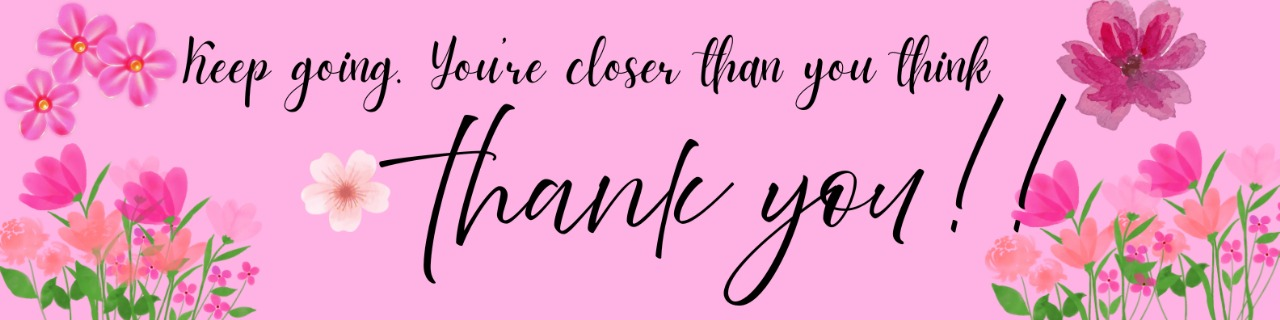